<a href="https://colab.research.google.com/github/david2003-bite-10-23/generative_ai/blob/main/%E7%94%9F%E6%88%90%E5%BC%8FAI_0429%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 模型名稱：`runwayml/stable-diffusion-v1-5`  
- Scheduler：UniPCMultistepScheduler  
- VAE：（預設）

- 實作內容:主要是實作將中文轉成英文prompt的功能，以及提供使用者選擇多種已經預設好的不同風格的prompt

- 具體操作:使用者可以輸入文字的prompt，拉取選單選擇想要的風格，選擇是否要對prompt進行翻譯使其更加貼合模型，選擇兩個參數，一個步數選擇他要迭代的次數，另一個是guardian scale數值越大他會越符合prompt的描述

- 截圖:
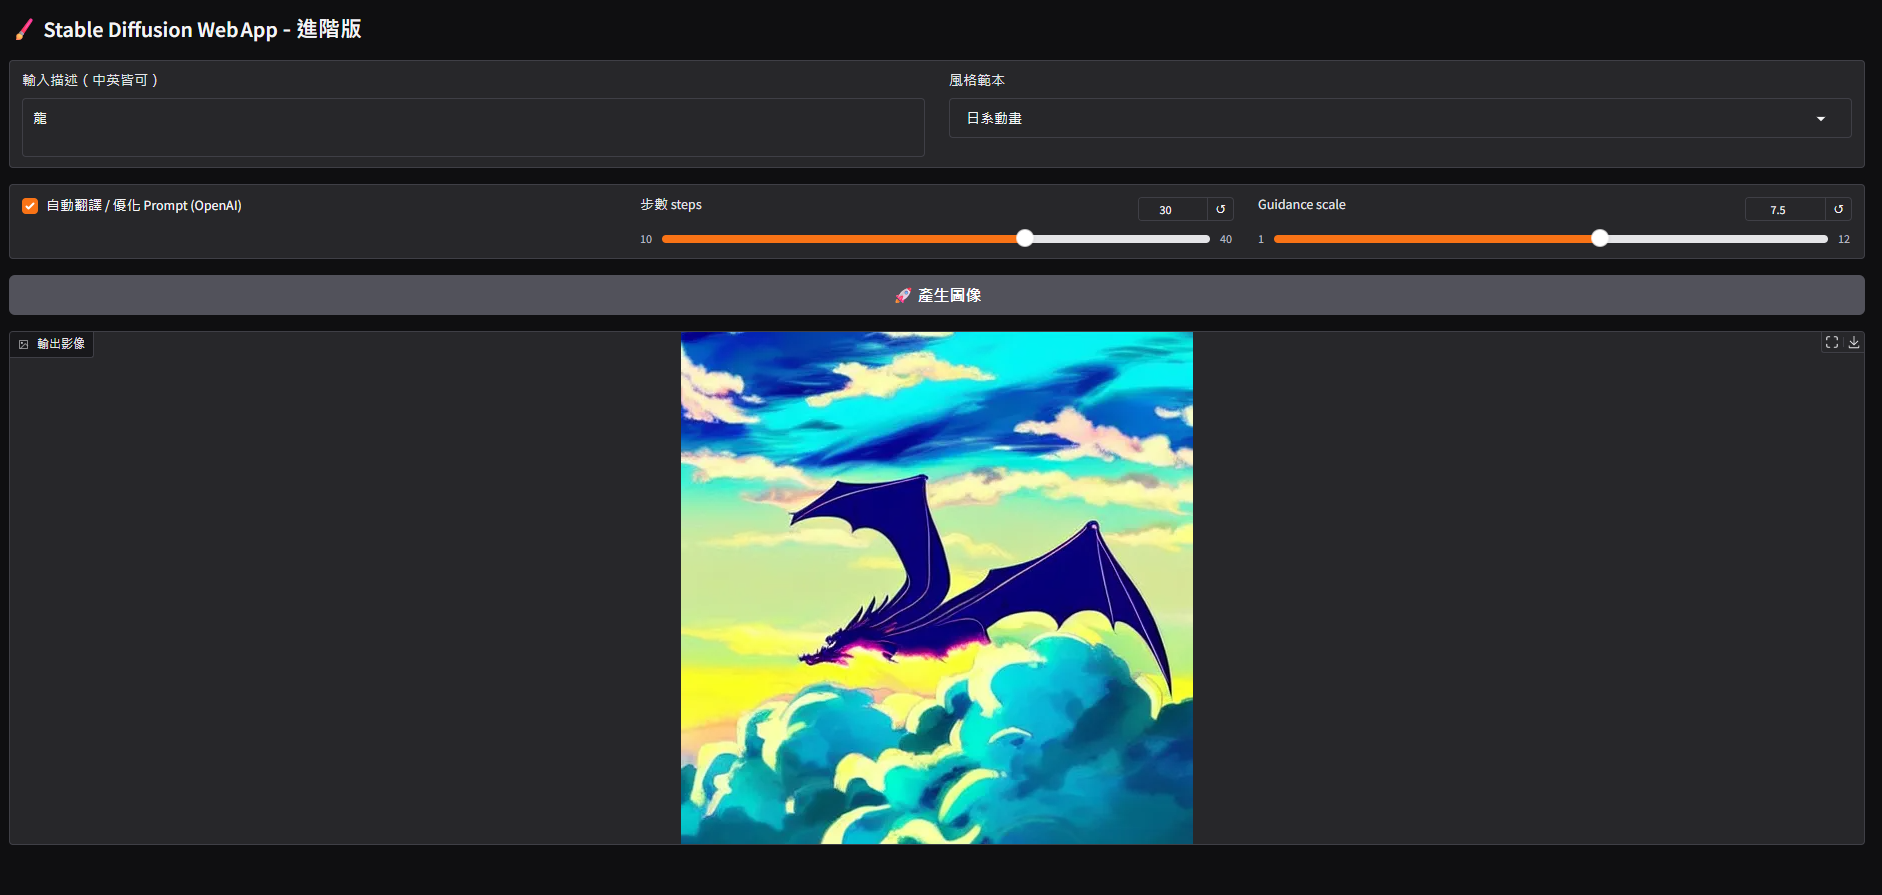
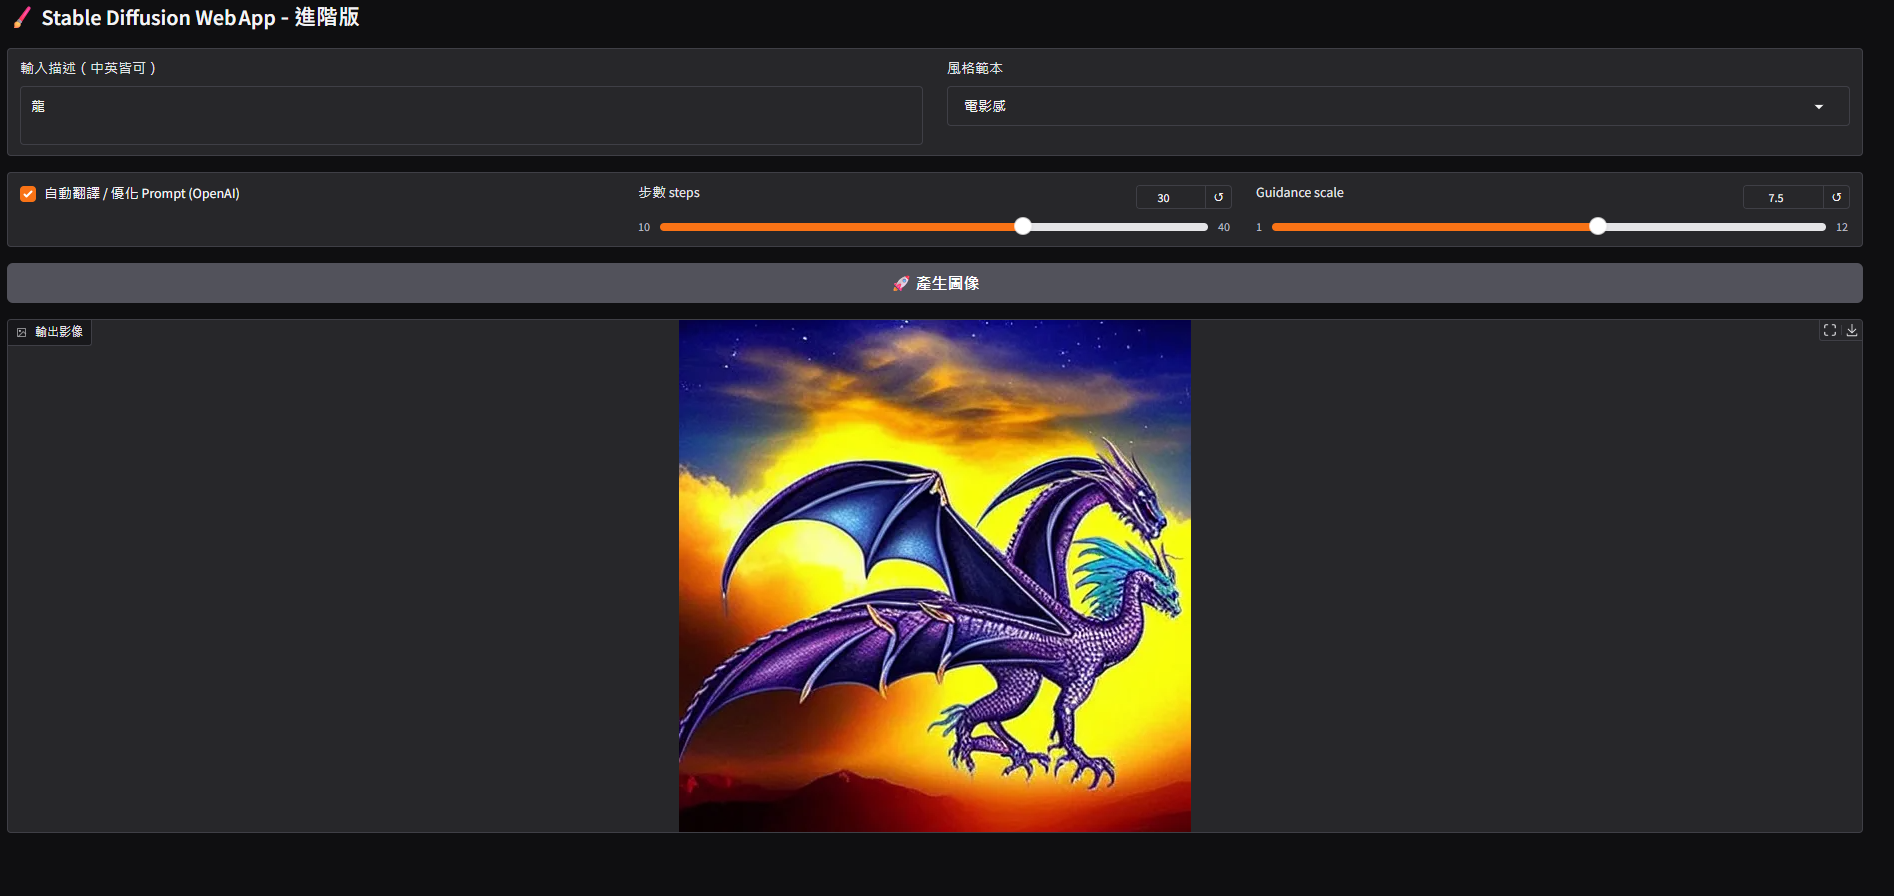




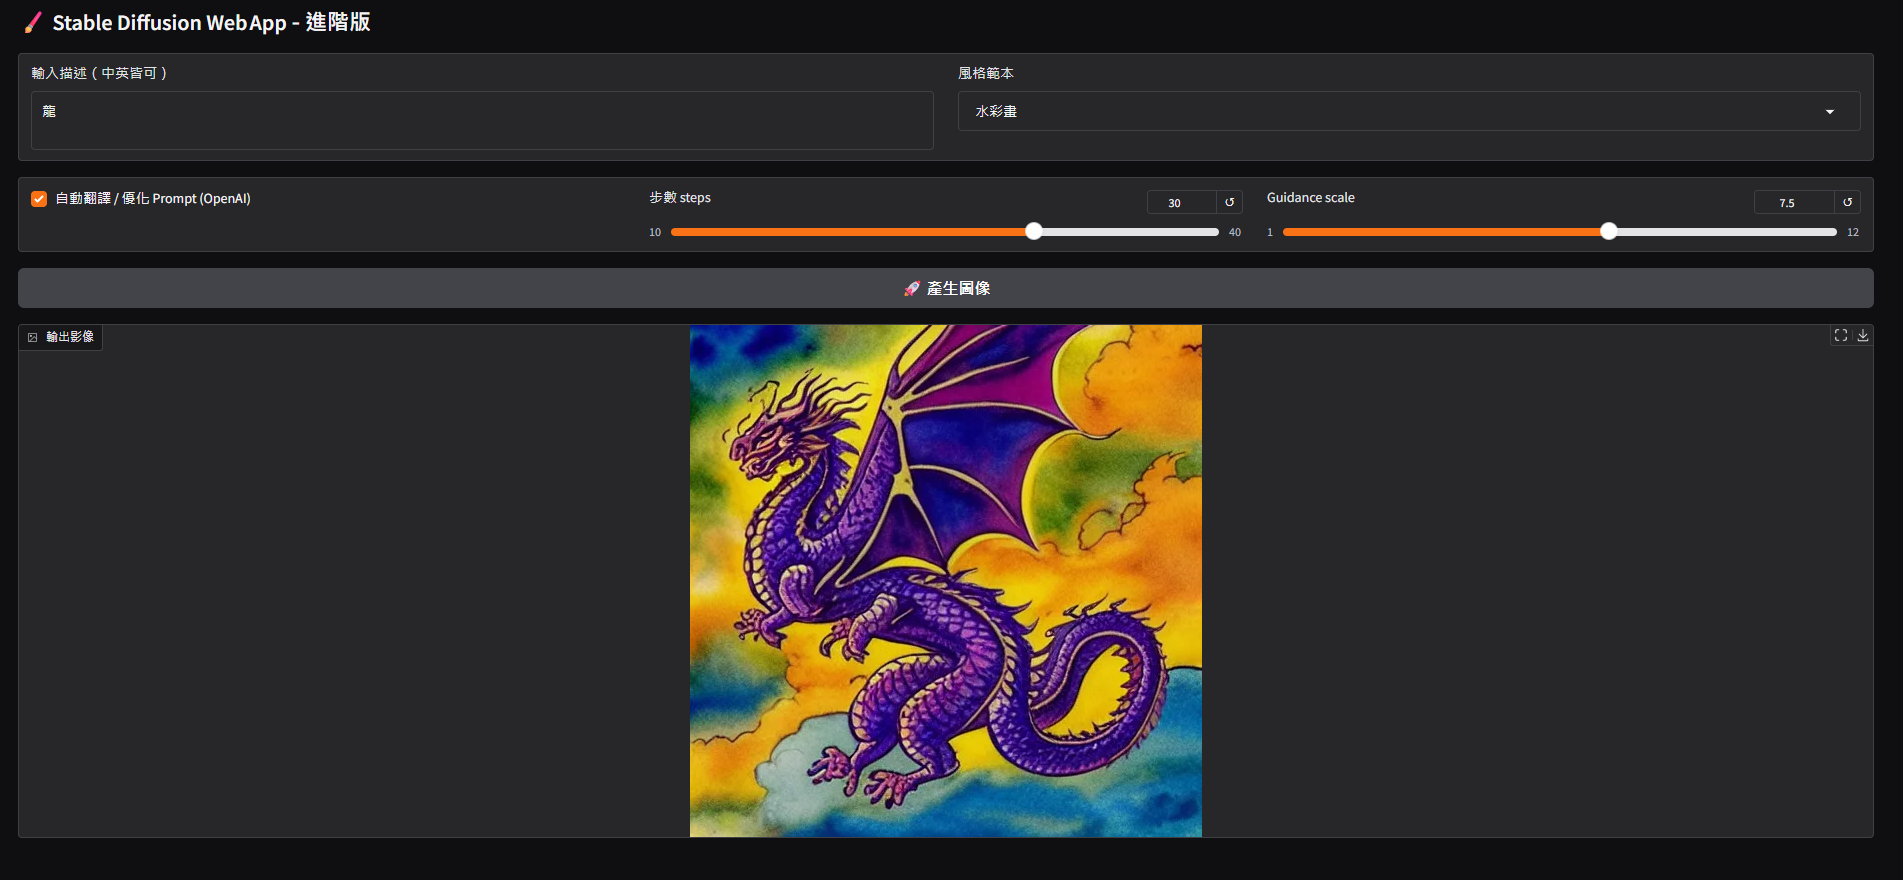
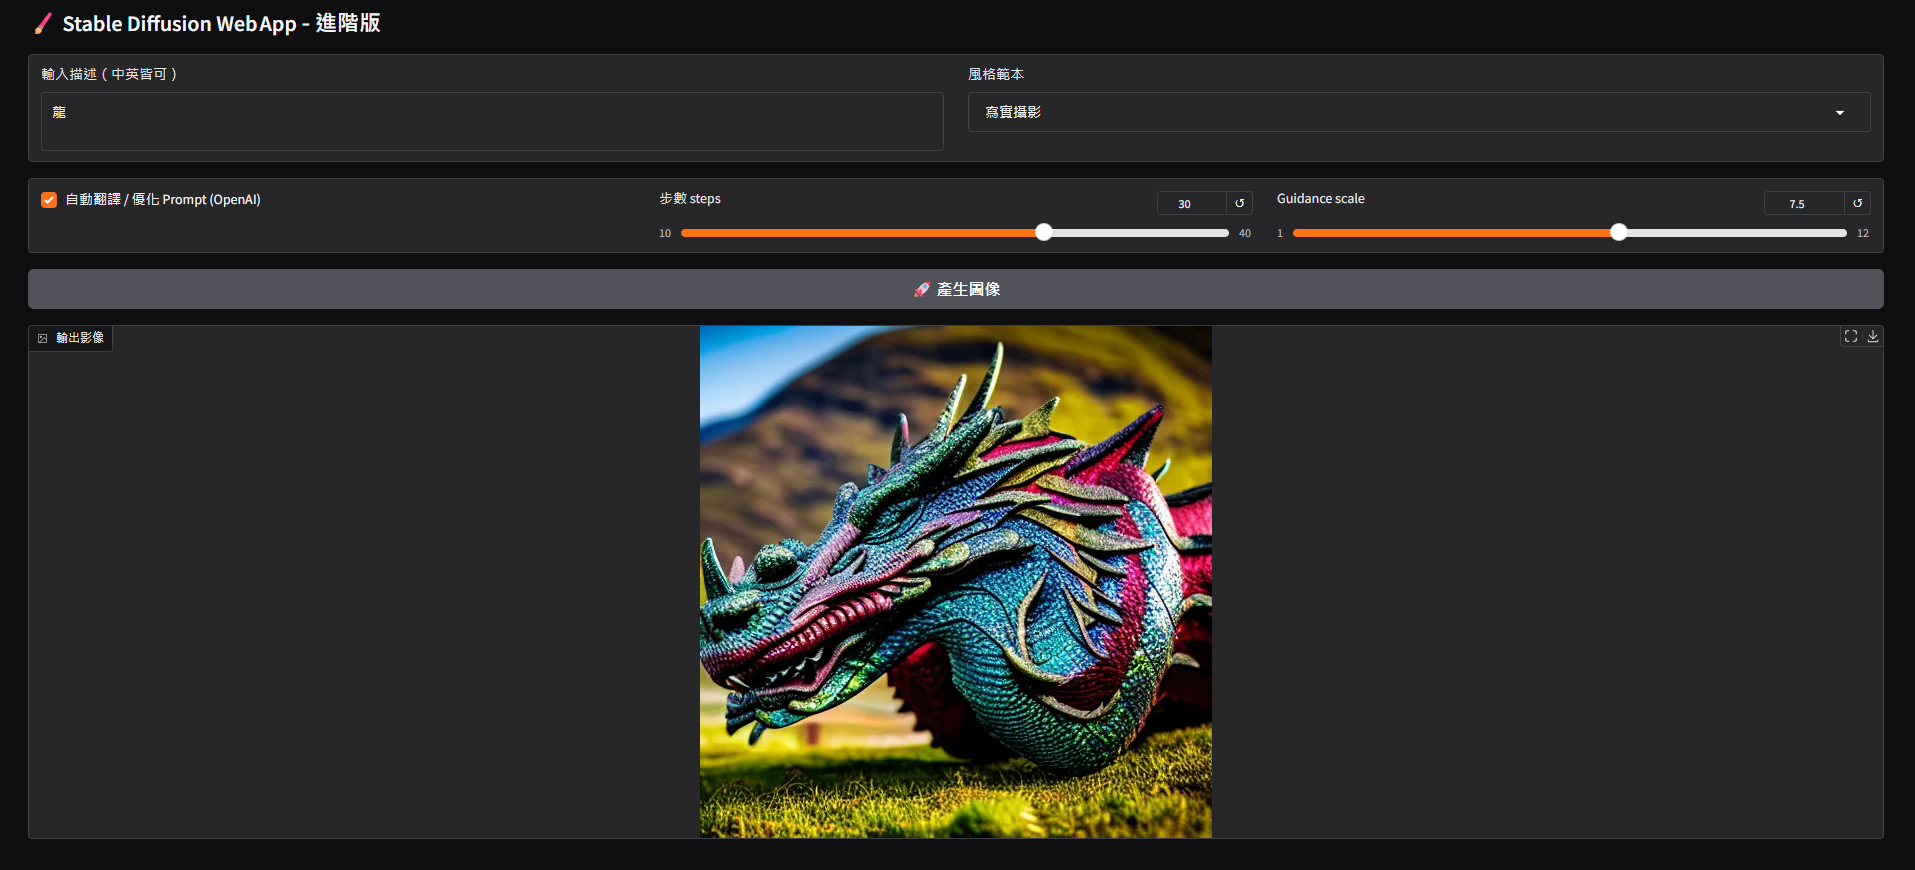
- 以上截圖做為不同風格畫風的範例

In [ ]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get("OpenAI")

In [ ]:
#@title 安裝必要套件
!pip install --upgrade diffusers transformers accelerate safetensors gradio openai

#@title 匯入模組
import torch, gc, random, openai, os
import gradio as gr
from diffusers import StableDiffusionPipeline, UniPCMultistepScheduler
from google.colab import userdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.0/662.0 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.

In [ ]:
#@title 載入 SD 管線 (v1‑5) & UniPC scheduler
model_name = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_name,
    torch_dtype=torch.float16,
    use_safetensors=True
).to("cuda")
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
#@title 多風格 Prompt / Negative Prompt 範本
STYLE_PRESETS = {
    "無": {
        "positive": "",
        "negative": ""
    },
    "油畫風": {
        "positive": "oil painting, rich brush strokes, canvas texture",
        "negative": "low resolution, blurry"
    },
    "卡通": {
        "positive": "cartoon style, bold outlines, flat colors",
        "negative": "photorealistic, excess detail"
    },
    "電影感": {
        "positive": "cinematic lighting, 35mm film, dramatic atmosphere",
        "negative": "overexposed, watermark"
    },
    "賽博龐克": {
        "positive": "cyberpunk, neon lights, rain-soaked streets, 4k",
        "negative": "low contrast, dull colors"
    },
    "日系動畫": {
        "positive": "anime style, vibrant, studio Ghibli aesthetic",
        "negative": "realistic skin texture"
    },
    "水彩畫": {
        "positive": "watercolor, soft edges, pastel palette",
        "negative": "sharp focus, photorealistic"
    },
    "寫實攝影": {
        "positive": "ultra‑photorealistic, 8k DSLR, perfect bokeh",
        "negative": "painting, illustration"
    }
}


In [ ]:
# 1. 從 Colab Secrets 讀取你的 API 金鑰
from google.colab import userdata
import os
from openai import OpenAI

# 嘗試讀取兩種常見的 Secret 名稱
secret = userdata.get("OpenAI") or userdata.get("OPENAI_API_KEY")
if not secret:
    raise RuntimeError(
        "❗ 尚未在 Colab Secrets 中設定 'OpenAI' 或 'OPENAI_API_KEY'，"
        "請前往側邊欄 → Settings → Secrets 建立對應金鑰。"
    )
# 同步到環境變數（部分套件會優先讀取此變數）
os.environ["OPENAI_API_KEY"] = secret

# 2. 初始化新版 OpenAI 客戶端
client = OpenAI(api_key=secret)

# 3. 定義中文→英文 Prompt 優化函式
def zh2en_optimize(zh_prompt: str) -> str:
    """
    使用新版 OpenAI Python SDK（>=1.0.0）將中文描述翻譯並擴寫為
    適合 Stable Diffusion 的英文 prompt。
    """
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "system",
                "content": (
                    "You are a prompt engineer for Stable Diffusion. "
                    "Translate the following Chinese user description into an English prompt, "
                    "enhancing it with relevant keywords while preserving the core imagery."
                )
            },
            {"role": "user", "content": zh_prompt}
        ],
        temperature=0.7,
        max_tokens=120
    )
    # 新版返回的 message 物件屬性為 .content
    return response.choices[0].message.content.strip()


In [ ]:
def generate_images(
    user_prompt,                       # 使用者輸入
    style_name,                        # 下拉選擇
    auto_translate,                    # bool
    steps, scale
):
    # ---- 1. 自動翻譯（若有勾選）----
    prompt = zh2en_optimize(user_prompt) if auto_translate else user_prompt

    # ---- 2. 取出風格範本 ----
    style = STYLE_PRESETS.get(style_name, STYLE_PRESETS["無"])
    if style["positive"]:
        prompt = f"{prompt}, {style['positive']}"
    negative_prompt = style["negative"] if style["negative"] else None

    # ---- 3. 生圖 ----
    gc.collect(); torch.cuda.empty_cache()
    out = pipe(
        prompt       = prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=int(steps),
        guidance_scale=float(scale),
        generator    = torch.Generator("cuda").manual_seed(random.randint(0,2**32-1))
    )
    return out.images[0]


In [ ]:
#@title Gradio Blocks UI
with gr.Blocks(css=".gradio-container") as demo:
    gr.Markdown("## 🖌️ Stable Diffusion Web App ‑ 進階版")

    with gr.Row():
        txt_prompt  = gr.Textbox(lines=2, label="輸入描述（中英皆可）")
        style_dd    = gr.Dropdown(choices=list(STYLE_PRESETS.keys()),
                                  value="無", label="風格範本")
    with gr.Row():
        auto_trans  = gr.Checkbox(label="自動翻譯 / 優化 Prompt (OpenAI)", value=False)
        steps_sl    = gr.Slider(10, 40, value=30, step=2, label="步數 steps")
        scale_sl    = gr.Slider(1, 12, value=7.5, step=0.5, label="Guidance scale")

    btn = gr.Button("🚀 產生圖像")
    img_out = gr.Image(label="輸出影像", show_label=True)

    btn.click(
        fn=generate_images,
        inputs=[txt_prompt, style_dd, auto_trans, steps_sl, scale_sl],
        outputs=img_out,
        api_name="generate"
    )

demo.launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://df76cf2ee4cca362c0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


  0%|          | 0/30 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (112 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['essence of this mythical beast in your writing , incorporating details like its long serpentine body , sharp claws , and fiery breath ., cinematic lighting , 3 5 mm film , dramatic atmosphere']


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://df76cf2ee4cca362c0.gradio.live
